In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [4]:
#load the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


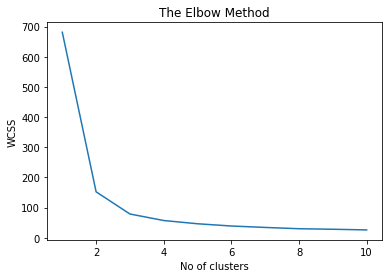

In [5]:
#Finding the optimum no of clusters and plotting them onto a line graph against Within cluster Sum of Squares (WCSS)

x = iris_df.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++",
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the elbow method graph

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
#Applying kmeans to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

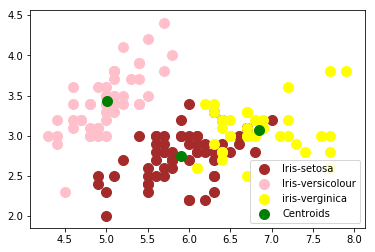

In [8]:
#Picturing the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s = 100, c = 'brown', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
           s = 100, c = 'yellow', label = 'iris-verginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'Green', label = 'Centroids')

plt.legend()